In [1]:
# Import all necessary libraries
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib
from pylab import *
import numpy as np
import random

%matplotlib notebook

In [2]:
# Number of pairs feature/label.
M = 1000

In [3]:
# Always reset the pseudo-random numbers generator to a known value so that your results are always the same.
np.random.seed(1234)

# Input values (features)
x1 = np.random.randn(M, 1)

x2 = 10*np.random.randn(M, 1) + 10

# Output values (targets).
y = x1 + x2 + np.random.randn(M, 1)

In [4]:
# Generate values for parameters.
N = 200
a1 = np.linspace(-12.0, 14.0, N)
a2 = np.linspace(-12.0, 14.0, N)

A1, A2 = np.meshgrid(a1, a2)

# Generate points for plotting the cost-function surface.
J = np.zeros((N,N))
for iter1 in range(0, N):
    for iter2 in range(0, N):
        yhat = A1[iter1][iter2]*x1 + A2[iter1][iter2]*x2
        J[iter1][iter2] = (1/M)*np.sum( np.square(y - yhat)  )

In [5]:
# Concatenate both column vectors.
X = np.c_[x1, x2]

# Closed-form solution.
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
yhat = a_opt[0, 0]*x1 + a_opt[1, 0]*x2
Joptimum = (1/M)*np.sum(np.power((y - yhat), 2))

In [6]:
# Batch gradient descendent solution.

# learning rate.
alpha = 0.004
# Maximum number of iterations.
n_iterations = 2000

# Random initialization of parameters.
a = np.zeros((2,1))
a[0] = -20;
a[1] = -20;

# Create vector for parameter history.
a_hist = np.zeros((2, n_iterations+1))
# Initialize history vector.
a_hist[0, 0] = a[0]
a_hist[1, 0] = a[1]

# Create array for storing error values.
Jgd = np.zeros(n_iterations+1)

Jgd[0] = (1/M)*sum(np.power(y - X.dot(a), 2))

# Batch gradient-descent loop.
iteration = 0
error = 1
grad_hist = np.zeros((2, n_iterations))
#while iteration < n_iterations and error > 0.001:a
while iteration < n_iterations:
    gradients = -2/M * X.T.dot(y - X.dot(a))
    grad_hist[0, iteration] = gradients[0]
    grad_hist[1, iteration] = gradients[1]
    a = a - alpha * gradients
    a_hist[0, iteration+1] = a[0]
    a_hist[1, iteration+1] = a[1]
    Jgd[iteration+1] = (1/M)*sum(np.power( (y - X.dot(a)) , 2))
    error = np.abs(Jgd[iteration+1] - Jgd[iteration])
    iteration = iteration + 1



<IPython.core.display.Javascript object>


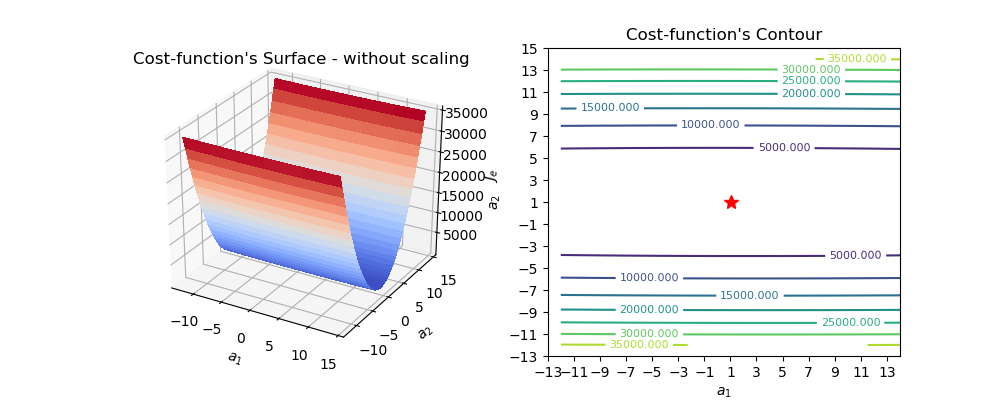

In [7]:
# Plot cost-function surface.
fig = plt.figure(figsize=(10, 4))

ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
ax.set_xlabel('$a_1$')
ax.set_ylabel('$a_2$')
ax.set_zlabel('$J_e$')
plt.title('Cost-function\'s Surface - without scaling')

ax = plt.subplot(1, 2, 2)
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=8)
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=10)
plt.xlabel('$a_1$', fontsize=10)
plt.ylabel('$a_2$', fontsize=10)
plt.title('Cost-function\'s Contour')
ax.set_xticks(np.arange(-13, 15, step=2.0))
ax.set_yticks(np.arange(-13, 16, step=2.0))

#Show the plot.
plt.show()

<IPython.core.display.Javascript object>


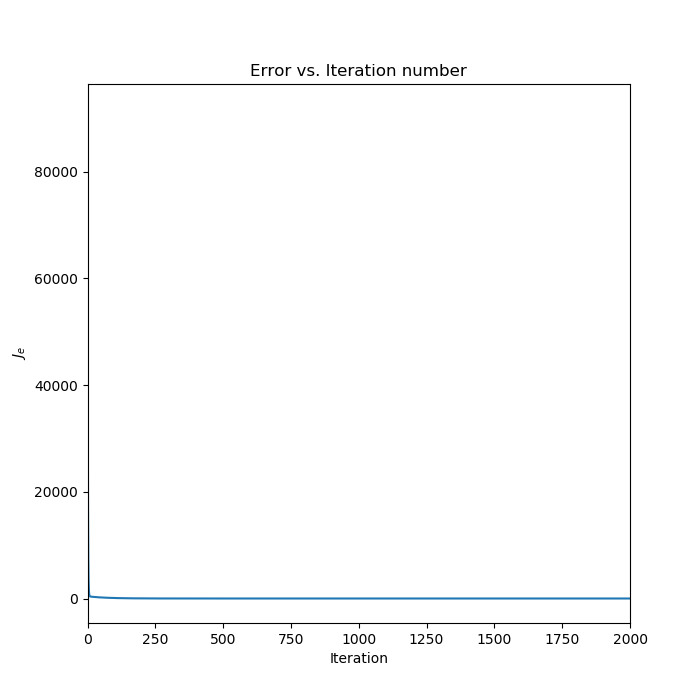

In [8]:
fig = plt.figure(figsize=(7,7))
plt.plot(np.arange(0, iteration), Jgd[0:iteration])
plt.xlim((0, iteration))
#plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
plt.show()
#plt.savefig("Error_vs_iteration_bgd_Execise_8A.png", dpi=600)

In [9]:
# Print found values.
print('a1_opt: ' + str(a_opt[0, 0]))
print('a2_opt: ' + str(a_opt[1, 0]))

print('a1_gd: ' + str(a[0, 0]))
print('a2_gd: ' + str(a[1, 0]))

a1_opt: 1.0366392301221743
a2_opt: 1.0047662051741453
a1_gd: 1.0366339998216738
a2_gd: 1.0047662118174674
